<a href="https://colab.research.google.com/github/natdebandi/text_mining_unrn/blob/main/topic_modelling_clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEXT MINING

UNRN

Especialización en ciencias de datos aplicada

Natalia Debandi

ndebandi@unrn.edu.ar

**CLASE 4**

Aprendizaje no supervisado - Topic modelling

Definamis las liberias que vamos a usa. Si alguna falla agreguen la linea de instalación

In [ ]:
#!pip install gensim
#Si les llega a falla la siguiente linea ejecuten esto y reinicien la sesion. A veces falla

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from gensim import corpora, models
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

ModuleNotFoundError: No module named 'gensim'

Defino un conjutno de textos de ejemplo. Probemos distintos.

In [ ]:
# Sample documents
documents = [
    "Machine learning is the study of computer algorithms that improve automatically through experience.",
    "Machine learning algorithms build a mathematical model based on sample data, known as training data.",
    "Deep learning is part of a broader family of machine learning methods based on artificial neural networks.",
    "Deep learning architectures such as deep neural networks are inspired by information processing in biological systems.",
    "Natural language processing enables computers to understand, interpret, and manipulate human language.",
    "NLP systems are based on machine learning and especially statistical machine learning approaches.",
    "Topic modeling is a type of statistical modeling for discovering abstract topics in a collection of documents.",
    "Latent Dirichlet Allocation is a generative statistical model that allows sets of observations to be explained by unobserved groups."
]

Se prepara una función de proceasmiento. Usamos las stopwords en inglés de la libreria nltk

In [ ]:

# Preprocessing function
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


In [ ]:

# Preprocess all documents
processed_docs = [preprocess_text(doc) for doc in documents]

**Latent Semantic Analysis (LSA)**



In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)

# Perform SVD (LSA)
n_components = 3  # Number of topics
lsa = TruncatedSVD(n_components)
lsa_tfidf = lsa.fit_transform(tfidf)


In [ ]:
# Print LSA topics
terms = tfidf_vectorizer.get_feature_names_out()
print("LSA Topics:")
for i, component in enumerate(lsa.components_):
    terms_in_topic = zip(terms, component)
    sorted_terms = sorted(terms_in_topic, key=lambda x: x[1], reverse=True)[:5]
    print(f"Topic {i+1}:", [t[0] for t in sorted_terms])


LSA Topics:
Topic 1: ['learning', 'machine', 'algorithms', 'based', 'statistical']
Topic 2: ['statistical', 'model', 'algorithms', 'based', 'machine']
Topic 3: ['processing', 'deep', 'statistical', 'networks', 'neural']


**Latent Dirichlet Allocation (LDA)**

In [ ]:
# Create a dictionary and document-term matrix for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
# Create LDA model --> num of topics 3
lda_model = models.LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=3,
                           random_state=42,
                           passes=10)

# Print LDA topics
print("\nLDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


LDA Topics:
Topic 1: 0.049*"modeling" + 0.049*"topic" + 0.049*"computer" + 0.049*"language" + 0.028*"processing" + 0.028*"statistical" + 0.028*"collection" + 0.028*"abstract" + 0.028*"type" + 0.028*"discovering"
Topic 2: 0.017*"statistical" + 0.017*"group" + 0.017*"allocation" + 0.017*"allows" + 0.017*"unobserved" + 0.017*"dirichlet" + 0.017*"set" + 0.017*"observation" + 0.017*"latent" + 0.017*"explained"
Topic 3: 0.083*"learning" + 0.057*"machine" + 0.044*"based" + 0.044*"deep" + 0.031*"data" + 0.031*"network" + 0.031*"neural" + 0.031*"system" + 0.031*"model" + 0.031*"statistical"


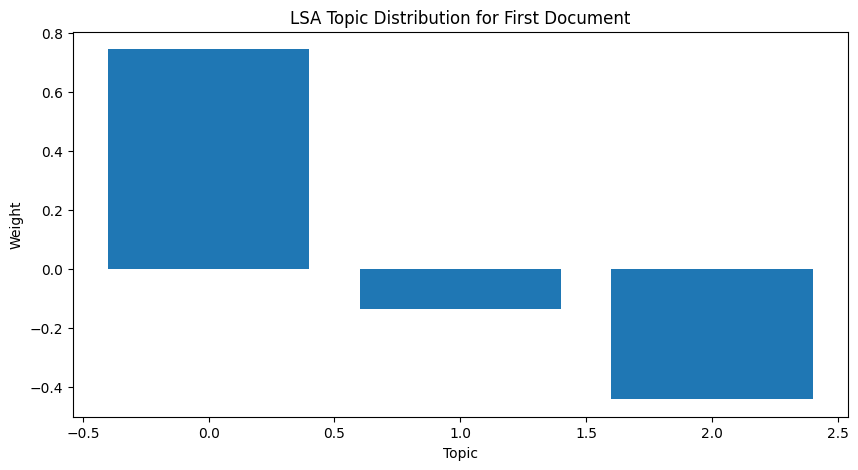

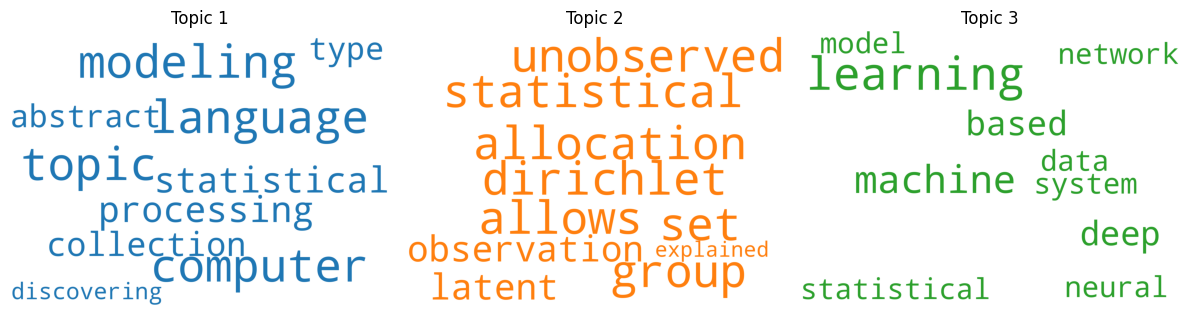

In [ ]:
# Visualize LSA document-topic distribution
plt.figure(figsize=(10, 5))
plt.bar(range(n_components), lsa_tfidf[0])
plt.xlabel('Topic')
plt.ylabel('Weight')
plt.title('LSA Topic Distribution for First Document')
plt.show()

# Visualize LDA topics (word weights)
import matplotlib.colors as mcolors
from wordcloud import WordCloud

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    topic_words = dict(lda_model.show_topic(i, 10))
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(f'Topic {i+1}')

plt.tight_layout()
plt.show()